**Exploring California Wildfires: Kiran Singh**
======
***

# Table of Contents
## Part 1: Reading and Merging Data Sources
## Part 2: Explore Data
    1 Fires by cause in 2016
    2 Acres Burned YoY
    3 Suppression Costs YoY
## Part 3: Next Steps

# Part 1: Reading and Merging Data Sources
***

### Data sources:
+ http://www.fire.ca.gov/fire_protection/fire_protection_fire_info_redbooks_2016 (2016 data)
    + http://www.fire.ca.gov/downloads/redbooks/2016_Redbook/2016_Redbook_FiresByCause_ByCounty.pdf (Number of Fires by Cause,  2016)
    + http://www.fire.ca.gov/downloads/redbooks/2016_Redbook/2016_Redbook_AcresByCause_ByCounty.pdf (Acrage of Fires, by Cause, 2016)
    + http://www.fire.ca.gov/downloads/redbooks/2016_Redbook/2016_Redbook_DollarsByCause_ByCounty.pdf (Dollar Cost of Fires, by Cause, 2016)
    + http://www.fire.ca.gov/downloads/redbooks/2016_Redbook/2016_Redbook_Summary.pdf (Who has Agency?, 2016)


+ http://cdfdata.fire.ca.gov/incidents/incidents_statsevents (YoY data)
    + http://cdfdata.fire.ca.gov/pub/cdf/images/incidentstatsevents_269.pdf     (Fires/Acres Burned 1987-2016)
    + http://www.fire.ca.gov/fire_protection/downloads/SuppressionCostsOnepage.pdf (Suppression Costs YoY)
    + http://www.fire.ca.gov/communications/downloads/fact_sheets/Top20_Acres.pdf (20 Largest Fires)
       
#### Note: Source PDF's converted with: https://www.pdftoexcel.com/ 

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib import ticker as tick
import seaborn as sns

### Reading csvs

In [2]:
df_2016_causes_by_number = pd.read_csv('2016_Redbook_FiresByCause_ByCounty.csv')
df_2016_causes_by_acrage = pd.read_csv('2016_Redbook_AcresByCause_ByCounty.csv')
df_2016_causes_by_dollar = pd.read_csv('2016_Redbook_DollarsByCause_ByCounty.csv')
df_fires_YoY = pd.read_csv('All Fires- Fires & Acres by Jurisdiction.csv')
df_20_largest_fires = pd.read_csv('Top20_size.csv')
df_supression_costs = pd.read_csv('SuppressionCosts.csv')

### Create Dictionary of  Descriptive Names for 'Causes'

In [3]:
descriptive_causes = {'Arson':'Arson', 'Campfire':'Campfire', 'Debris Burning\n':'Debris Burning',
                      'Elec. Power':'Electric Power', 'Equip. Use':'Equipment Use', 'Ltng.': 'Lightning',
                      'Misc.':'Miscellaneous', 'P-W-F':'Playing with Fire','Railroad':'Railroad',
                      'Smoking':'Smoking', 'Undet.':'Undetermined', 'Vehicle':'Vehicle'}

# Part 2: Explore the data 
***

### Set Seaborn Style

In [4]:
sns.set_context('poster', font_scale=1.2)
sns.set_style('darkgrid')

## 1. Fires by cause in 2016

### Generate Total Values

In [5]:
df_2016_cause_total_fires = df_2016_causes_by_number.sum().iloc[2:].reset_index()
df_2016_cause_total_fires.rename(columns={'index':'Cause', 0:'Count'}, inplace=True)

### Apply Descriptive Names to 'Causes'

In [6]:
df_2016_cause_total_fires['Cause'] = df_2016_cause_total_fires['Cause'].map(descriptive_causes)

### Sort by Count

In [7]:
df_2016_cause_total_fires = df_2016_cause_total_fires.sort_values(['Count'], ascending=False)

### Plot Fires by Cause in 2016

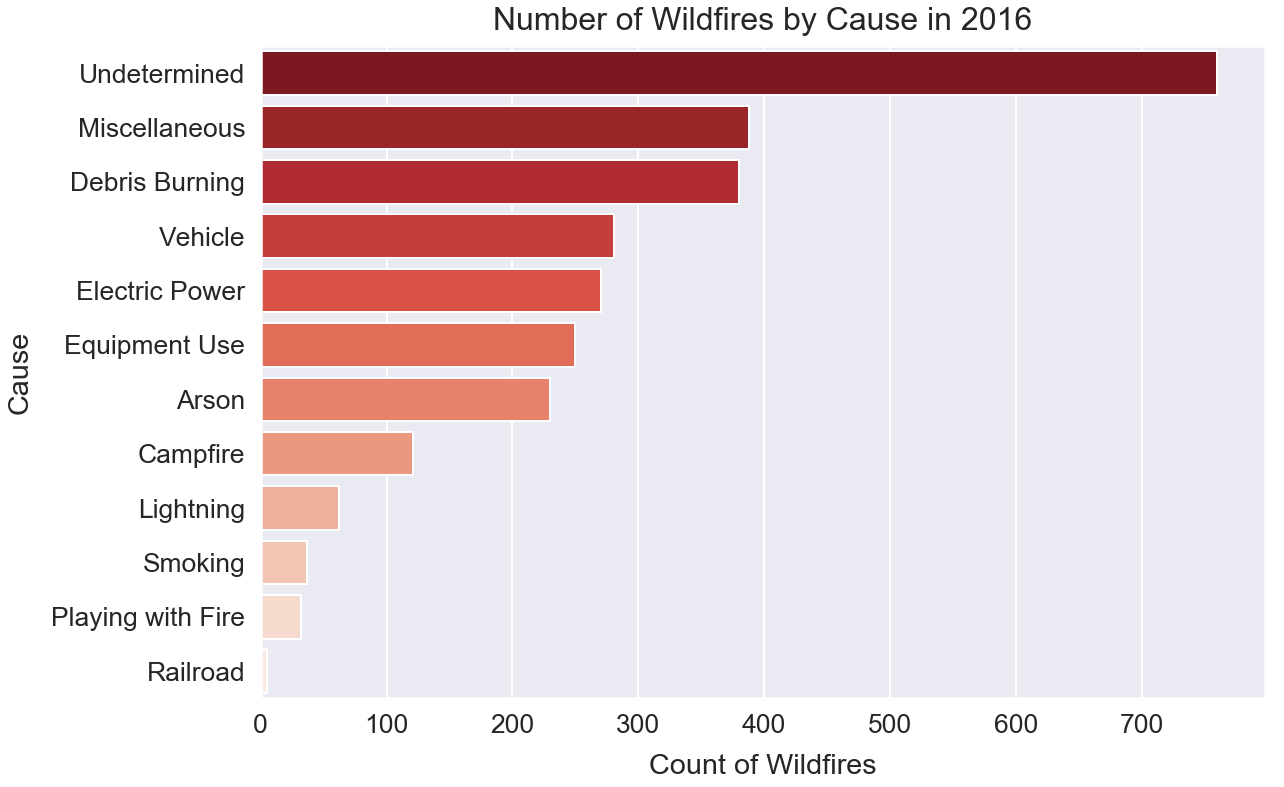

In [8]:
plt.figure(figsize=(18, 12))
sns.barplot(x='Count', y='Cause', data=df_2016_cause_total_fires, orient='h', palette='Reds_r')
plt.xlabel('Count of Wildfires', labelpad=16)
plt.ylabel('Cause', labelpad=18)
plt.title('Number of Wildfires by Cause in 2016', y=1.015, fontsize=32);

## Compare to Dollar Cost by Cause:

### Generate Total Values and Apply Descriptive Names

In [9]:
df_2016_cause_total_dollars = df_2016_causes_by_dollar.sum().iloc[2:].reset_index()
df_2016_cause_total_dollars.rename(columns={'index':'Cause', 0:'Count'}, inplace=True)
df_2016_cause_total_dollars['Cause'] = df_2016_cause_total_dollars['Cause'].map(descriptive_causes)

### Sort by Count

In [10]:
df_2016_cause_total_dollars = df_2016_cause_total_dollars.sort_values(['Count'], ascending=False)

### Function to Format Ticks

In [11]:
def format_ticks(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val/1000000)
        return '{:}M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:}K'.format(val)
    elif tick_val < 1000:
        return int(tick_val)
    else:
        return tick_val

### Make All Bars but 'Arson' Grey

In [12]:
colors = ['grey' if (x < max(df_2016_cause_total_fires['Count'])) else 'red' for x in df_2016_cause_total_fires['Count']]

### Plot Fires by Dollar Damage in 2016

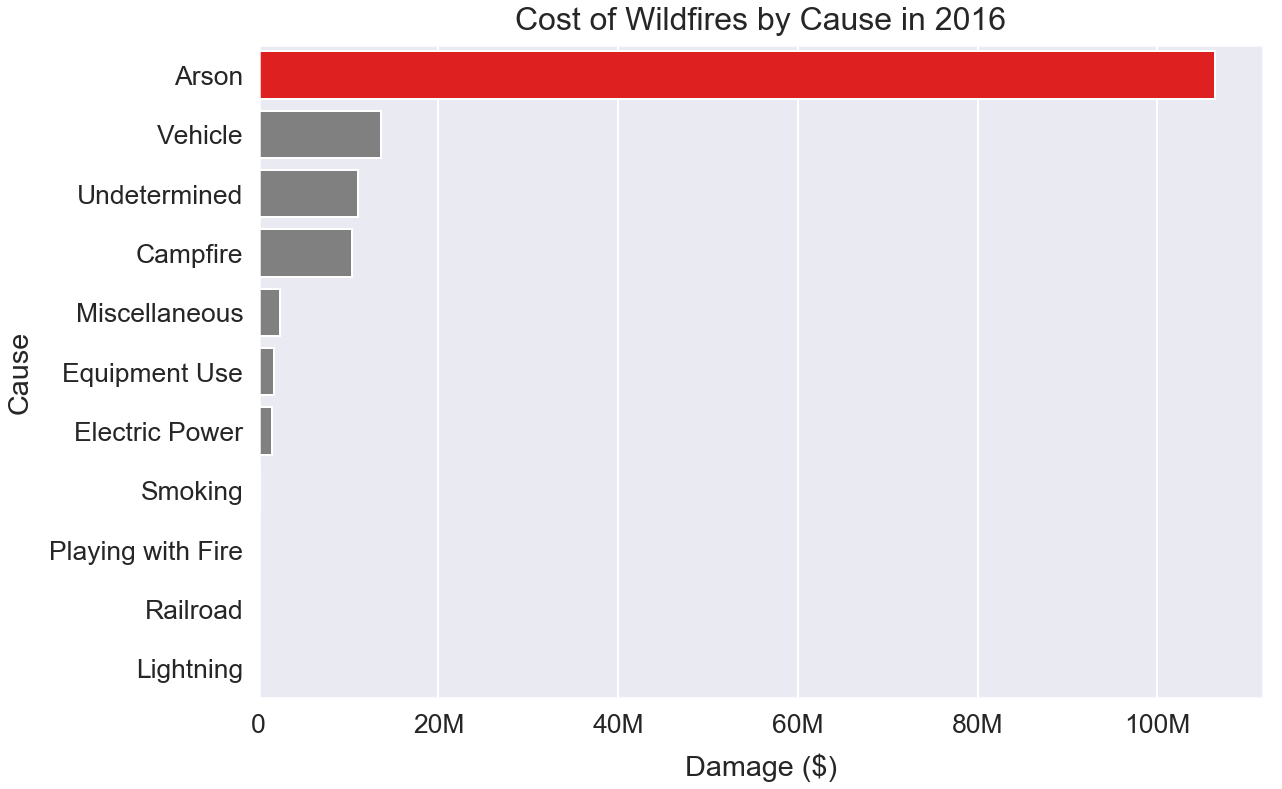

In [13]:
plt.figure(figsize=(18, 12))
ax = sns.barplot(x='Count', y='Cause', data=df_2016_cause_total_dollars, orient ='h', palette= colors)
plt.xlabel('Damage ($)', labelpad=16)
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.ylabel('Cause', labelpad=16)
plt.title('Cost of Wildfires by Cause in 2016', y=1.015, fontsize=32);

## 2. Acres Burned YoY

### Format Datatypes for the Following Plot

In [14]:
df_fires_YoY['TOTAL ACRES'] = df_fires_YoY['TOTAL ACRES'].astype(str)
df_fires_YoY['TOTAL ACRES'] = df_fires_YoY['TOTAL ACRES'].str.replace(',', '')
df_fires_YoY['TOTAL ACRES'] = df_fires_YoY['TOTAL ACRES'].astype(int)
df_fires_YoY['Year'] = df_fires_YoY['Year'].astype(int)

### Modified Function to Format Y Ticks

In [15]:
def format_ticks_2(tick_val, pos):
    if tick_val > 1000000:
        val = float(tick_val/1000000)
        return '{:}M'.format(val)
    elif tick_val == 1000000:
        val = int(tick_val/1000000)
        return '{:}M'.format(val)
    elif tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:}K'.format(val)
    elif tick_val < 1000:
        return int(tick_val)
    else:
        return tick_val

### Function to Format X Ticks

In [16]:
def format_ticks_shortyear(tick_val, pos):
    if tick_val:
        val = str(int(tick_val))[2:]
        return "'" + val

### Plot Acres Burned YoY from 1987 to 2016

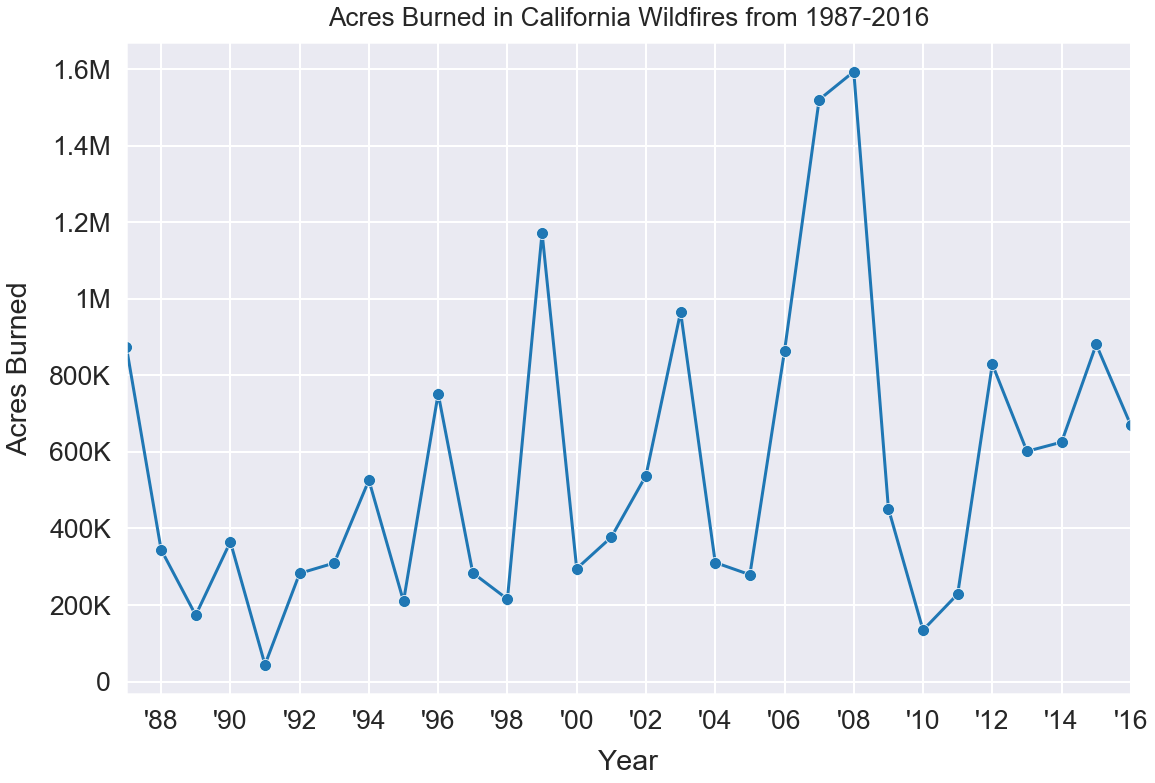

In [17]:
plt.figure(figsize=(18, 12))
ax = sns.lineplot(x='Year', y='TOTAL ACRES', data=df_fires_YoY, marker='o')
plt.xlabel('Year', labelpad=16)
plt.xlim(1987, 2016)
ax.xaxis.set_major_formatter(tick.FuncFormatter(format_ticks_shortyear))
plt.ylabel('Acres Burned', labelpad=16)
ax.yaxis.set_major_formatter(tick.FuncFormatter(format_ticks_2))
plt.locator_params(axis='x', nbins=25)  # increase y-value frequency 
plt.title('Acres Burned in California Wildfires from 1987-2016', y=1.015, fontsize=26);

## 3. Suppression Costs YoY

### Subset to the Same Years as the Previous Graph 

In [18]:
df_supression_costs['Year'] = df_supression_costs['Year'].astype(int)
df_supression_costs_subset = df_supression_costs.loc[(df_supression_costs['Year']>1986) & (df_supression_costs['Year']<2018)]

### Plot Suppression Costs YoY

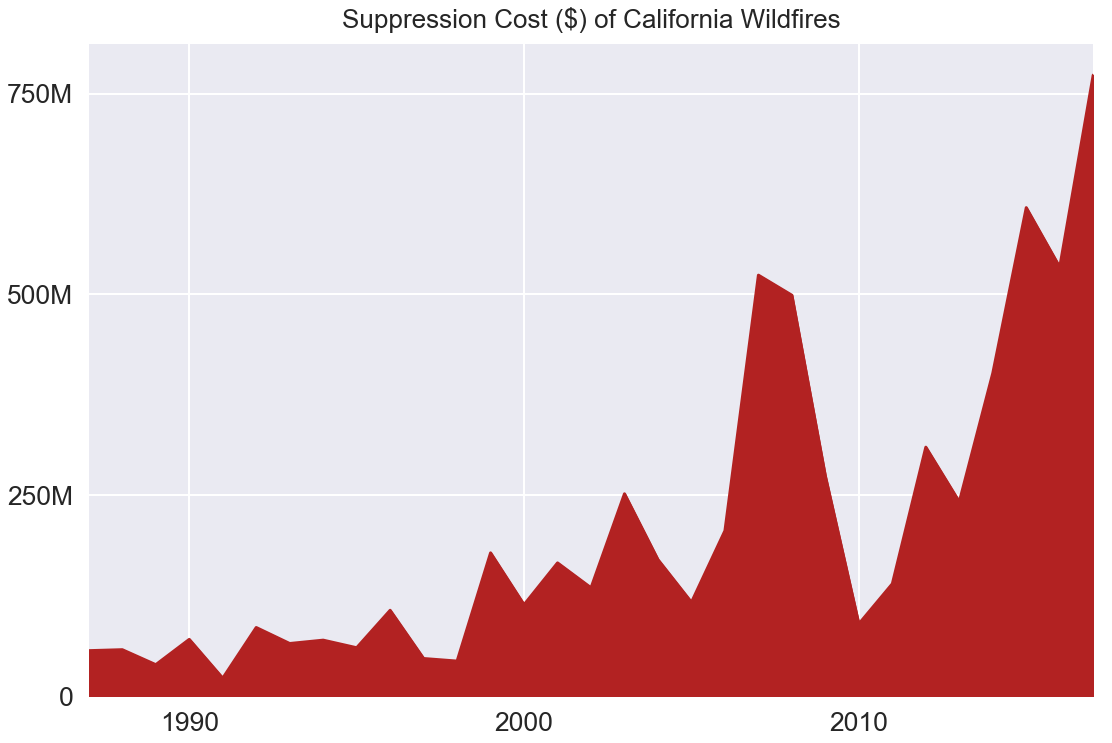

In [21]:
ax = df_supression_costs_subset.plot(x='Year', y='Expenditures', kind='area', rot=0, figsize=(18, 12), color='firebrick')
ax = plt.gca()
ax.spines['top'].set_visible(False) # removes top of frame
ax.spines['right'].set_visible(False) # removes right of frame
ax.spines['bottom'].set_visible(False) # removes bottom frame
ax.spines['left'].set_visible(False) # removes left frame
ax.legend_.remove()
plt.xlabel("")
plt.xlim(1987,2017)
plt.locator_params(axis='x', nbins=3)  # reduces x-value frequency 
plt.ylabel("")
ax.yaxis.set_major_formatter(tick.FuncFormatter(format_ticks))
plt.locator_params(axis='y', nbins=4)  # reduces y-value frequency 
plt.title('Suppression Cost ($) of California Wildfires', y=1.015, fontsize=26);

# Part 3: Next Steps
***

#### 1. Compare Largest Fires with the Most Destructive

#### 2. Compare the Responsibility of Different Agencies (Federal, State, U.S. Forest Service, etc.)

#### 3. Create a Heat map of Fires on an interactive map of California
   + (Explore Ploty.Figure_Factory, GeoPandas)

#### 4. Find and Explore More Granular (Transactional Level) Fire Data
   + Scatter Plot / Regression Analysis
   + Explore Time of Day / Month of Year Trends